# Setup
Because we switch to `tf2`, instead of using `tf.slim`, we will just use `tf.keras` for the inception model weights.

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import tensorflow.keras as keras
keras.__version__

'2.4.0'

In [3]:
inception_model = keras.applications.inception_v3.InceptionV3()

In [4]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Total params: 23,851,784
Trainable params: 23,817,352
Non-trainable params: 34,432
__________________________________________________________________________________________________


We need to find a way to make the weigths of `inception_model` constant, instead of `tf.Variable`, otherwise, we cannot train for an adversarial attack.

In [5]:
def non_dunder(obj, strict=False):
    if strict:
        prefix = "_"
    else:
        prefix = "__"
    return [s for s in dir(obj) if not s.startswith(prefix)]

In [6]:
non_dunder(inception_model, True)

['activity_regularizer',
 'add_loss',
 'add_metric',
 'add_update',
 'add_variable',
 'add_weight',
 'apply',
 'build',
 'built',
 'call',
 'compile',
 'compiled_loss',
 'compiled_metrics',
 'compute_dtype',
 'compute_mask',
 'compute_output_shape',
 'compute_output_signature',
 'count_params',
 'distribute_strategy',
 'dtype',
 'dtype_policy',
 'dynamic',
 'evaluate',
 'evaluate_generator',
 'fit',
 'fit_generator',
 'from_config',
 'get_config',
 'get_input_at',
 'get_input_mask_at',
 'get_input_shape_at',
 'get_layer',
 'get_losses_for',
 'get_output_at',
 'get_output_mask_at',
 'get_output_shape_at',
 'get_updates_for',
 'get_weights',
 'history',
 'inbound_nodes',
 'input',
 'input_mask',
 'input_names',
 'input_shape',
 'input_spec',
 'inputs',
 'layers',
 'load_weights',
 'losses',
 'make_predict_function',
 'make_test_function',
 'make_train_function',
 'metrics',
 'metrics_names',
 'name',
 'name_scope',
 'non_trainable_variables',
 'non_trainable_weights',
 'optimizer',
 'out

In [7]:
inception_model.trainable

True

In [8]:
inception_model.trainable = False
inception_model.trainable

False

In [9]:
inception_model.trainable_weights, inception_model.trainable_variables

([], [])

In [10]:
inception_model.layers

In [11]:
inception_model.layers[0].input.shape

TensorShape([None, 299, 299, 3])

In [12]:
image = tf.Variable(tf.zeros((1, 299, 299, 3)))

How should we solve this question?

Note that although we cannot make a model using `tf.Variable` as input,
we can make `image` input of `inception_model`.

In [13]:
inception_model(image)

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[4.31017659e-04, 3.32327909e-04, 2.53500999e-04, 2.83194327e-04,
        5.22126618e-04, 5.37490763e-04, 1.18336444e-04, 4.60172945e-04,
        3.42794083e-04, 4.87075537e-04, 3.46313929e-04, 1.81991563e-04,
        1.77539114e-04, 1.48301086e-04, 1.54501220e-04, 2.95949198e-04,
        5.15563646e-04, 2.00293653e-04, 3.23193759e-04, 1.81776733e-04,
        3.00646410e-04, 2.68637203e-03, 1.27837004e-03, 4.35263617e-04,
        3.66052263e-04, 2.31926053e-04, 3.03516310e-04, 2.33348750e-04,
        3.61928920e-04, 2.23213909e-04, 1.03388913e-04, 4.41607845e-04,
        1.57879767e-04, 3.36226367e-04, 8.01972812e-04, 1.39403695e-04,
        2.14718399e-04, 1.34171234e-04, 1.01800147e-03, 2.11177612e-04,
        2.42629365e-04, 2.92203942e-04, 4.07369691e-04, 3.71638598e-04,
        2.47096963e-04, 3.51564842e-04, 4.14005481e-04, 3.85800435e-04,
        2.10099504e-04, 1.34753223e-04, 1.68580053e-04, 4.41498152e-04,
        8.076

In [14]:
import json
from pathlib import Path
from urllib.request import urlretrieve

In [15]:
imagenet_json = Path("imagenet.json")
if not imagenet_json.exists():
    imagenet_json, _ = urlretrieve(
        'https://www.anishathalye.com/media/2017/07/25/imagenet.json'
    )

with open(imagenet_json) as f:
    imagenet_labels = json.load(f)
imagenet_labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [16]:
len(imagenet_labels)

1000

## Example image

We load our example image and make sure it's classified correctly.

In [17]:
import numpy as np
import PIL

In [18]:
img_path = Path("cat.jpg")
if not img_path.exists():
    img_path, _ = urlretrieve('https://www.anishathalye.com/media/2017/07/25/cat.jpg')
img_class = 281
imagenet_labels[img_class]

'tabby, tabby cat'

In [19]:
img = PIL.Image.open(img_path)
big_dim = max(img.width, img.height)
wide = img.width > img.height
new_w = 299 if not wide else int(img.width * 299 / img.height)
new_h = 299 if wide else int(img.height * 299 / img.width)
img = img.resize((new_w, new_h)).crop((0, 0, 299, 299))
img = (np.asarray(img) / 255.0).astype(np.float32)
img.shape

(299, 299, 3)

In [20]:
np.random.rand(7)[[1,3,5]]

array([0.63593985, 0.62719905, 0.44864377])

It seems that `tf.Tensor`, like `list`, cannot access its subarray in this manner.

In [21]:
p = inception_model(np.expand_dims(img, axis=0))[0]
p.shape

TensorShape([1000])

In [22]:
p.numpy()[[1,3,4]]

array([7.1843247e-06, 2.1938207e-05, 1.8855206e-05], dtype=float32)

In [23]:
def classify(img, correct_class=None, target_class=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    fig.sca(ax1)  # sca() Select Current Axis
    p = inception_model(np.expand_dims(img, axis=0))[0]
    p = p.numpy()
    print(f"type(p) = {type(p)}, len(p) = {len(p)}")
    ax1.imshow(img)
    #fig.sca(ax1)  # Why should there be two fig.sca(ax1)?
    
    # display the top 10 prediceted classes
    #topk = list(p.argsort()[-10:][::-1])
    #topk = list(tf.argsort(p)[-10:][::-1])
    topk = list((tf.argsort(p)[-10:][::-1]).numpy())
    print(f"topk = {topk}")
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)
    if target_class in topk:
        barlist[topk.index(target_class)].set_color('r')
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')
    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10),
               [imagenet_labels[i][:15] for i in topk],
               rotation='vertical')
    # :15 means "taking the first 15 characters" for fear of long-string class.
    fig.subplots_adjust(bottom=0.2)
    plt.show()

**(?)** What is the `new_w, new_h, resize()` all about?<br>
**(R)** The story was that Anish wanted to `crop((0,0,299,299))`, i.e. crop the `299x299` subimage for the upper left corner for each image. But the reality is that _**not every image has both width and height larger than**_ `299`. So the `resize((new_w, new_h))` was there to guarantee this. Indeed,
\begin{align}
  h_{\text{new}} = 299,\;  w_{\text{new}} = h_{\text{new}} \frac{w}{h} \quad\text{when}\quad h < w \\
  w_{\text{new}} = 299,\;  h_{\text{new}} = w_{\text{new}} \frac{h}{w} \quad\text{when}\quad h \ge w
\end{align}

which converted into words says **_always convert the shorter side to_** `299` and **_the longer side to its rightful length according to the original ratio_**.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [25]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "axes.titlecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

type(p) = <class 'numpy.ndarray'>, len(p) = 1000
topk = [281, 282, 285, 840, 287, 728, 753, 478, 738, 15]


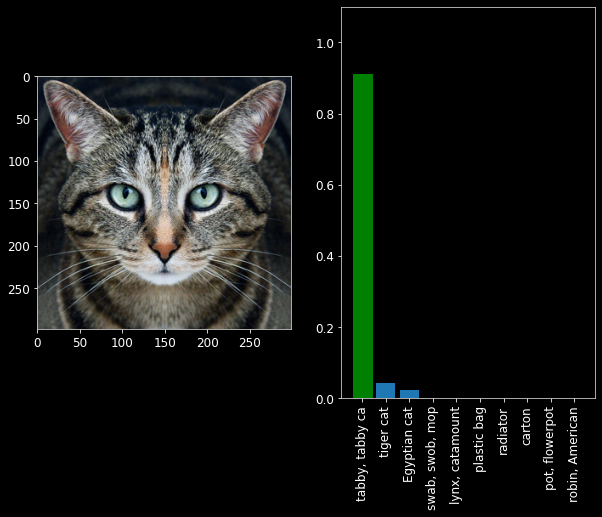

In [26]:
classify(img, correct_class=img_class)

# Adversarial examples

Given an image $\mathbf{x}$, our neural network outputs a probability distribution over labels, $P(y \mid \mathbf{x})$. When we craft an adversarial input, we want to find an $\hat{\mathbf{x}}$ where $\log P(\hat{y} \mid \hat{\mathbf{x}})$ is maximized for a target label $\hat{y}$: that way, our input will be misclassified as the target class. We can ensure that $\hat{\mathbf{x}}$ doesn't look too different from the original $\mathbf{x}$ by constraining ourselves to some $\ell_\infty$ <del>box</del> ball with radius $\epsilon$, requiring that $\left\lVert \mathbf{x} - \hat{\mathbf{x}} \right\rVert_\infty \le \epsilon$.

In this framework, an adversarial example is the solution to a constrained optimization problem that we can solve using [backpropagation](https://colah.github.io/posts/2015-08-Backprop/) and projected gradient descent, basically the same techniques that are used to train networks themselves. The algorithm is simple:

We begin by initializing our adversarial example as $\hat{\mathbf{x}} \leftarrow \mathbf{x}$. Then, we repeat the following until convergence:

1. $\hat{\mathbf{x}} \leftarrow \hat{\mathbf{x}} + \alpha \cdot \nabla \log P(\hat{y} \mid \hat{\mathbf{x}})$
2. $\hat{\mathbf{x}} \leftarrow \mathrm{clip}(\hat{\mathbf{x}}, \mathbf{x} - \epsilon, \mathbf{x} + \epsilon)$

In [ ]:
demo_epsilon = 2.0/255.0 # a really small perturbation
demo_lr = 1e-1
demo_steps = 100
demo_target = 924 # "guacamole"
# Test other target classes at your own will
demo_target = imagenet_labels.index("pizza, pizza pie")


# initialization step
#sess.run(assign_op, feed_dict={x: img})
x_hat = image

# projected gradient descent
for i in tqdm(range(demo_steps)):
    ## gradient descent step
    #_, loss_value = sess.run(
    #    [optim_step, loss],
    #    feed_dict={learning_rate: demo_lr, y_hat: demo_target})
    ## project step
    #sess.run(project_step, feed_dict={x: img, epsilon: demo_epsilon})
    with tf.GradientTape() as tape:
        log_likelihood = 
    if (i+1) % 10 == 0:
        print('step %d, loss=%g' % (i+1, loss_value))

## Continue in `v2.ipynb`
I would like to wrap `p = inception_model(np.expand_dims(img, axis=0))[0]` inside another function named `inception()` (we might have to replace `np.expand_dims()` by `tf.expand_dims()`)